#**Evidencia 1. Análisis de similitud empleando Inteligencia Artificial: Detector de reutilización de texto**
## Equipo:
* Rubén Sánchez Mayén A01378379
* Octavio Andrick Sánchez Perusquia A01378649
* Joan Daniel Guerrero García A01378052

In [3]:
from numpy import loadtxt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
#Cargar dataset
dataset = loadtxt('dataset_reutilizacion_texto.csv', delimiter=',')

In [5]:
#Separar datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split

datos_entrenamiento, datos_pruebas = train_test_split(dataset, test_size=0.15, random_state=25)

print(f"Número de datos de entrenamiento: {len(datos_entrenamiento)}")
print(f"Número de datos de pruebas: {len(datos_pruebas)}")

Número de datos de entrenamiento: 69
Número de datos de pruebas: 13


In [6]:
#Separar variable predicada
x_entrenamiento = datos_entrenamiento[:,:3]
y_entrenamiento = datos_entrenamiento[:,3]
x_pruebas = datos_pruebas[:,:3]
y_pruebas = datos_pruebas[:,3]

In [7]:
model = Sequential()
model.add(Dense(12, input_shape=(3,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_entrenamiento, y_entrenamiento, epochs=25, batch_size=4)

Epoch 1/25
18/18 [==============================] - 6s 6ms/step - loss: 0.6905 - accuracy: 0.5797
Epoch 2/25
18/18 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.6812
Epoch 3/25
18/18 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.6667
Epoch 4/25
18/18 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.6667
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.6667
Epoch 6/25
18/18 [==============================] - 0s 10ms/step - loss: 0.6747 - accuracy: 0.6667
Epoch 7/25
18/18 [==============================] - 0s 12ms/step - loss: 0.6727 - accuracy: 0.6812
Epoch 8/25
18/18 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.6667
Epoch 9/25
18/18 [==============================] - 0s 8ms/step - loss: 0.6672 - accuracy: 0.6667
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 0.6653 - accuracy: 0.6667
Epoch 11/25
18/1

In [10]:
#Evaular modelo
_, accuracy = model.evaluate(x_pruebas, y_pruebas)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 140ms/step - loss: 0.5352 - accuracy: 0.9231
Accuracy: 92.31


In [11]:
#Algunas predicciones de ejemplo
predictions = (model.predict(x_pruebas))
for i in range(10):
  print('%s => %s (expected %d)' % (x_pruebas[i].tolist(), round(predictions[i][0]), y_pruebas[i]))

1/1 [==============================] - 0s 70ms/step
[0.2677042411256416, 0.09852967413281138, 0.02616621825098168] => 0 (expected 0)
[0.59419430136341, 0.4925766094967005, 0.47619047619047694] => 1 (expected 1)
[0.29177848744088203, 0.06136734330875301, 0.021016277499709354] => 0 (expected 0)
[0.4949399496798402, 0.3910371502940005, 0.3376872344663547] => 1 (expected 1)
[0.24534987303147354, 0.05490357131894845, 0.019121909540392504] => 0 (expected 0)
[0.26660538511543436, 0.08, 0.0251562376591058] => 0 (expected 0)
[0.5070478415948734, 0.30613648917505576, 0.18123584150292726] => 1 (expected 1)
[0.2439836117813934, 0.048492982300807105, 0.023984194826439736] => 0 (expected 1)
[0.1818645770272399, 0.0368456777319719, 0.010415960313100294] => 0 (expected 0)
[0.27872598020817996, 0.0877058019307029, 0.021652326748721033] => 0 (expected 0)


In [12]:
model.save('detector_texto_reutilizado_e1.h5')

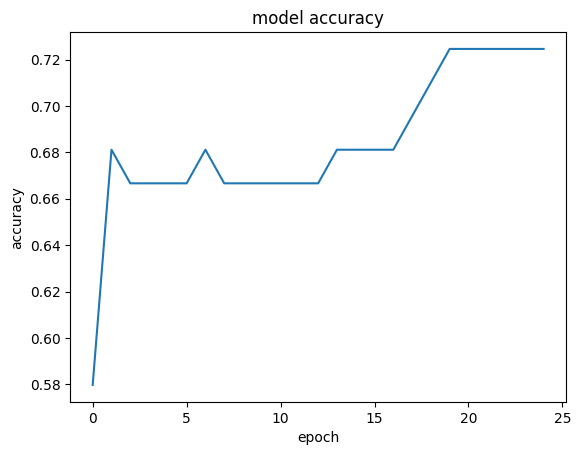

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 18ms/step


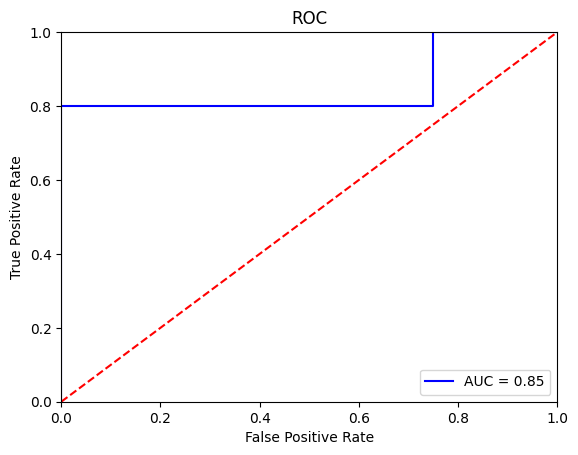

In [15]:
import sklearn.metrics as metrics

y_probas = model.predict(x_pruebas).flatten()
fpr, tpr, threshold = metrics.roc_curve(y_pruebas, y_probas)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()